# Notebook imports and packages

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [69]:
def f(x):
    return x**2 + x + 1

In [70]:
#Make Data

x_1 = np.linspace(start=-3, stop=3, num=100)


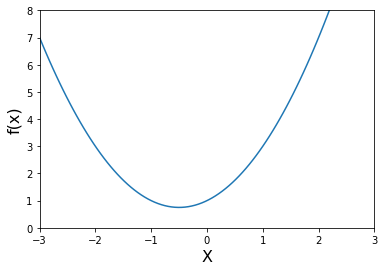

In [71]:
# Plot
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Printing x_1 and f(x_1) vales

x = x_1
x2 = f(x_1)

print("Value of x: ", x, " Value of f(x_1) : ", x2)

## Slope and Derivatives
Challange: $Derivative of f(x) called df(x)$

In [72]:
def df(x):
    return 2*x + 1

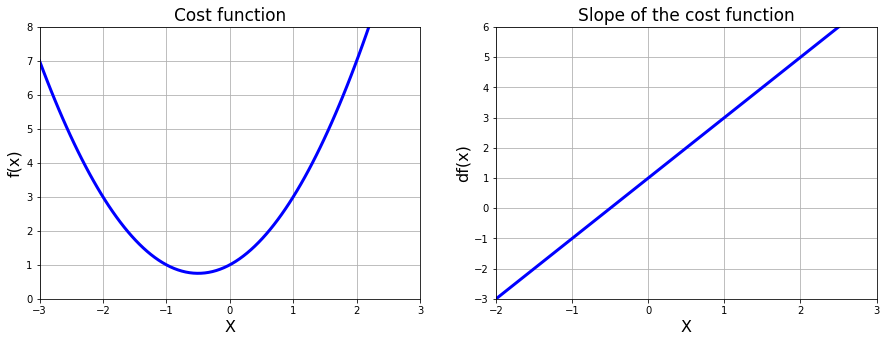

In [73]:
# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,3)
plt.ylim(-3, 6)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1,df(x_1), color='blue', linewidth=3)

plt.show()

## Python Loos & Gradient Descent

In [74]:
# Python For loop

for n in range(5):
    print("Hello World", n)

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4


In [75]:
# Python While loop

counter = 0
while counter <5:
    print('Counting...', counter)
    counter = counter + 1
print("Ready or not, here I come.")    


Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, here I come.


In [76]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times : ', n)
        break
    
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point at is:' , f(new_x))    

Loop ran this many times :  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point at is: 0.7500000015970362


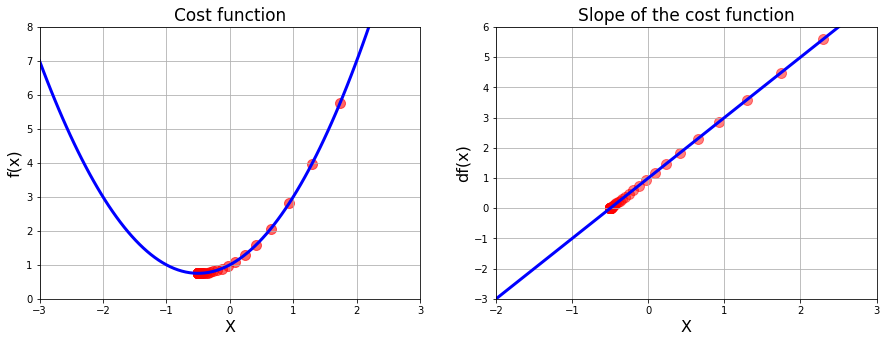

In [77]:
# Super impose gradient calculations on plot.
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)

plt.title('Cost function', fontsize=17)
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.grid()

plt.plot(x_1, f(x_1), color='blue', linewidth=3)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#2nd Chart: Derivative

plt.subplot(1,2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,3)
plt.ylim(-3, 6)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()

plt.plot(x_1,df(x_1), color='blue', linewidth=3)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

## Python for loop and list

In [78]:
def sing(num_bottles):
    lyrics = []
    for num in range(num_bottles, 0, -1):
        lyrics.append('{num} bottles of beer on the wall, {num} bottles of beer.'.format(num=num))
        lyrics.append('Take one down and pass it around, {num} bottles of beer on the wall.'.format(num = num - 1))
        lyrics.append('')
        
    return lyrics    

#sing(99)
    

## Example-2 Multiple minima vs initail gusess & advanced fucntions

### $$g(x) = x^4 - 4x^2 + 5$$

In [79]:
#Make some data

x_2 = np.linspace(-3,3,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

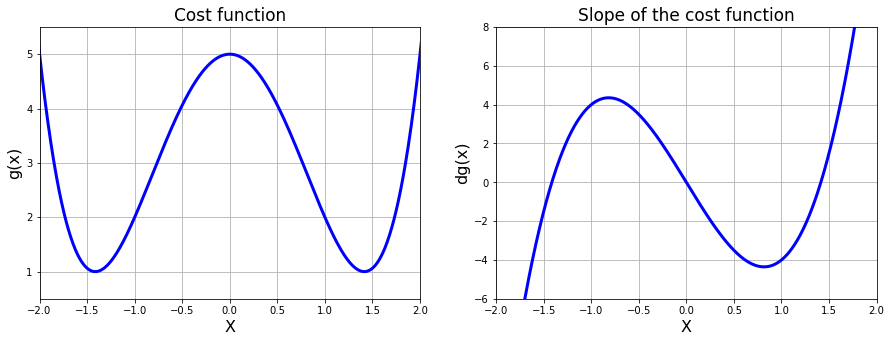

In [80]:

plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)

plt.title('Cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.grid()

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
values = np.array(x_list)
#plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

#2nd Chart: Derivative

plt.subplot(1,2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

plt.plot(x_2,dg(x_2), color='blue', linewidth=3)
#plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()

## Gradient Descent as Python funciton

In [81]:
# Gradient Descent


def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    
    new_x = initial_guess
    list_x = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        list_x.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, list_x, slope_list

In [82]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ",len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [83]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.01, precision=0.0001)
print("Local min occurs at: ", local_min)
print("Number of steps: ",len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [84]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print("Local min occurs at: ", local_min)
print("Number of steps: ",len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


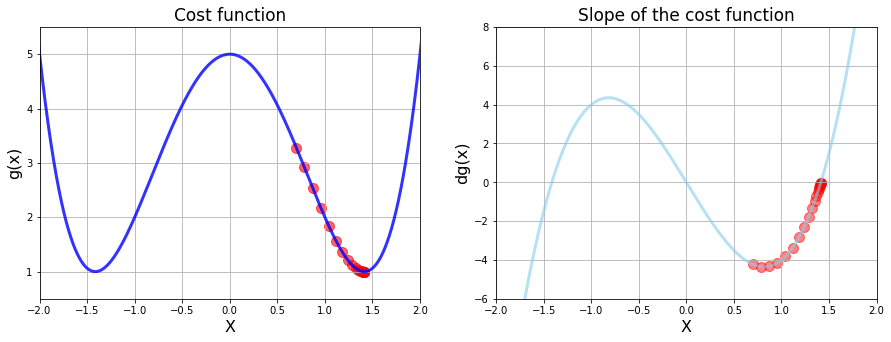

In [85]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.7)


# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6 )

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2,dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

## Example 3 - Divergence, Overflow and Python Tuples
### $$ h(x) = x^5 - 2x^4 +2$$

In [86]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 + 8*x**3

Local mini occurs at:  -0.19052522878757175
Cost at this minimum is:  1.9971135886297215
Number of run:  10


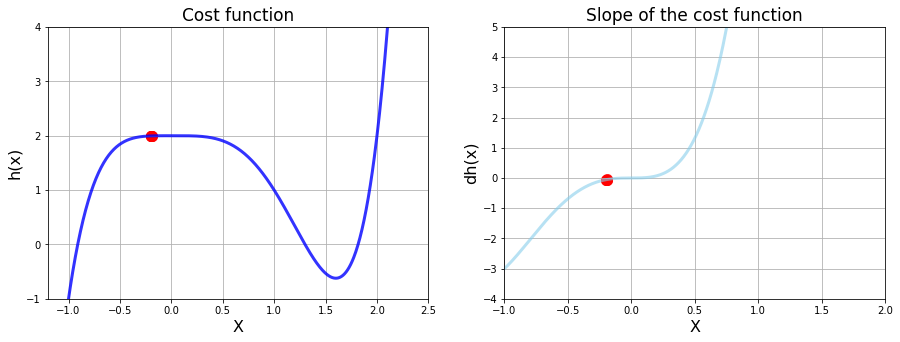

In [87]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)


# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-1.2,2.5)
plt.ylim(-1, 4)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6 )

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-1,2)
plt.ylim(-4, 5)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3,dh(x_3), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

print('Local mini occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of run: ', len(list_x))

plt.show()

In [88]:
import sys
sys.version
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

####Tuple vs List.
List is heterogeneous, tuples is homogeneous.

Tuples are immutable.

In [89]:
#Creating a tuple - tuple packing

breakfast = 'Coffe', 'Eggs', 'Bread'
unlucky_numbers = 12, 4, 9, 26, 17

#Accessing a value in Tuple
print('I love ', breakfast[0])
print('My hotel has noo ' + str(unlucky_numbers[3]) + "th floor")

#Seq unpacking

a, b, c = breakfast
print(a)
print(b)
print(c)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is: ', data_tuple[0])
print('Cost at the last x value is: ', h(data_tuple[0]))
print('Number of steps is: ', len(data_tuple[1]))

I love  Coffe
My hotel has noo 26th floor
Coffe
Eggs
Bread
Local min is:  0.17617209918665644
Cost at the last x value is:  1.9982431593480228
Number of steps is:  21



## The Learning Rate


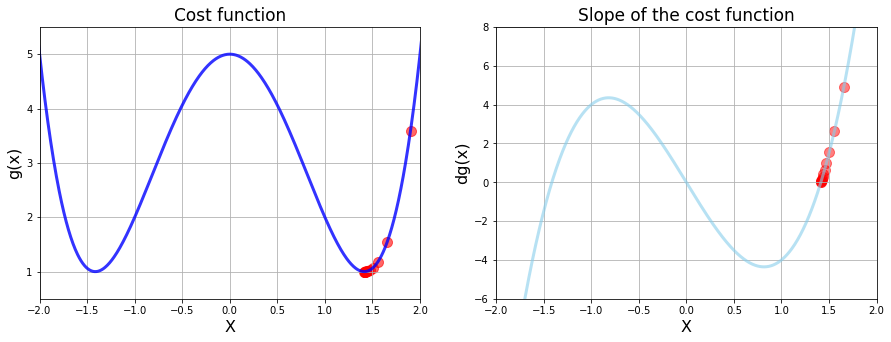

No of steps:  14


In [90]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)


# Plot function and derivative side by side
plt.figure(figsize=[15,5])

#1st Chart: Cost function.
plt.subplot(1,2, 1)
plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6 )

#2nd Chart: Derivative

plt.subplot(1,2, 2)
plt.grid()
plt.title('Slope of the cost function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2,dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('No of steps: ', len(list_x))

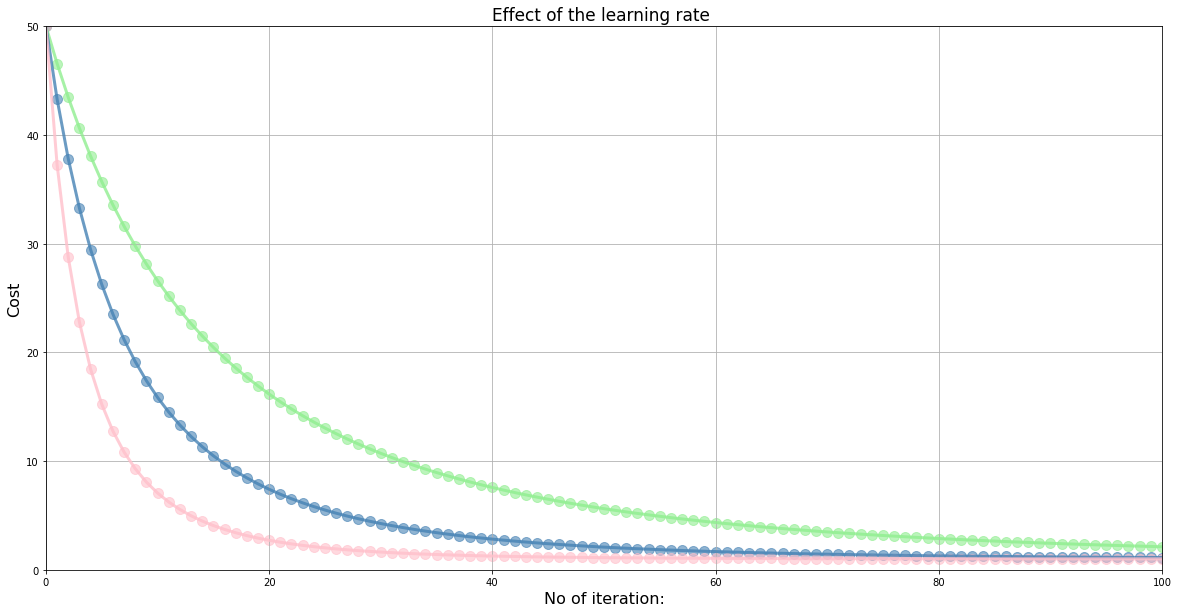

In [91]:
#Run Gradient_descent 3 times.
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)




# Plotting reduction in cost for each interation
plt.figure(figsize=[20,10])

plt.grid()

plt.xlim(0, n)
plt.ylim(0, 50)
plt.title('Effect of the learning rate ', fontsize=17)
plt.xlabel('No of iteration:', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Y axis
low_values = np.array(low_gamma[1])

# X axis
iterartion_list = list(range(0,n+1))

# Plotting low learning rate.
plt.plot(iterartion_list, g(low_values), color='lightgreen', linewidth=3, alpha=0.8)
plt.scatter(iterartion_list, g(low_values), color='lightgreen', s=100, alpha=0.6 )

# Plotting mid rate
plt.plot(iterartion_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=3, alpha=0.8)
plt.scatter(iterartion_list, g(np.array(mid_gamma[1])), color='steelblue', s=100, alpha=0.6)

# Plotting high rate
plt.plot(iterartion_list, g(np.array(high_gamma[1])), color='pink', linewidth=3, alpha=0.8)
plt.scatter(iterartion_list, g(np.array(high_gamma[1])), color='pink', s=100, alpha=0.6)




plt.show()


## Example 4 - Data Viz with 3d charts

### Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} + 1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [92]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [93]:
#Make our x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Share of X array', x_4.shape)
x_4, y_4 = np.meshgrid(x_4,y_4)
print('Share of X array', x_4.shape)

Share of X array (200,)
Share of X array (200, 200)


/var/folders/6_/m8g672753w3d4h1dr179jv680000gn/T/ipykernel_2768/3407399083.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


TypeError: scatter() missing 1 required positional argument: 'ys'

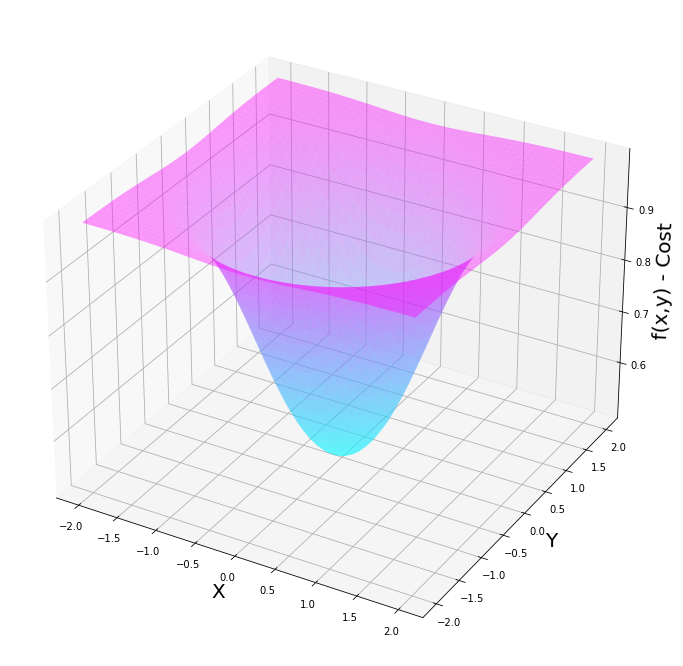

In [94]:
fig = plt.figure(figsize=[16,12])

ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.cool, alpha=0.4)
ax.scatter(values_array[:,1])

plt.show()

## Partial Derivatives & Symbolic Computation

### $$ \frac {\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}}{ \left( 3^{-x^2 - y^2} +1 \right) ^2}\ $$ 

### $$ \frac {\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}}{ \left( 3^{-x^2 - y^2} +1 \right) ^2}\ $$ 

In [ ]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is: ', f(a, b))
print('Partial drivative wrt x is: ', diff(f(a,b),a))
print('Value of f(x,y) at x=1.8, y=1.0 os:',
f(a,b).evalf(subs={a:1.8, b:1.0})) #Python dictionary

print('Value of partial derivative wrx is: ' ,diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))


## Batch Gradient Descent with SymPy

In [95]:
# Setup
multiplier = 0.1
max_iter = 500

params = np.array([1.8, 1.0]) # Initial guess
#params = [1.8, 1.0] # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y]) 
    
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
#Results

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))
    

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [96]:
def fpx(x, y):
    r = 3**(-x**2 -y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 -y**2)
    return 2*y*log(3)*r / (r + 1)**2


In [97]:
# Setup
multiplier = 0.1
max_iter = 500

params = np.array([1.8, 1.0]) # Initial guess
#params = [1.8, 1.0] # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y]) 
    
    params = params - multiplier * gradients
    
#Results

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))
    

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [98]:
# Setup
multiplier = 0.1
max_iter = 200

params = np.array([1.8, 1.0]) # Initial guess
#params = [1.8, 1.0] # Initial guess

values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y]) 
    
    params = params - multiplier * gradients
    
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
#Results

print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))
    

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


In [99]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought','MC'],['Questlove', 'Drums']])
#print(hs_band.shape)  
#print('hs_band[0] : ', hs_band[1][0])

the_root = np.append(arr=hs_band, values=kirk, axis=0)
#the_root = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1)
print(the_root)

print('Printing nicknames...', the_root[0,:])
                 
the_root = np.append(arr=the_root, values=[['Malik B', 'MC']], axis=0)    
print('Printing band roles...', the_root[:,1])    

(1, 2)
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'MC']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


/var/folders/6_/m8g672753w3d4h1dr179jv680000gn/T/ipykernel_2768/200830009.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


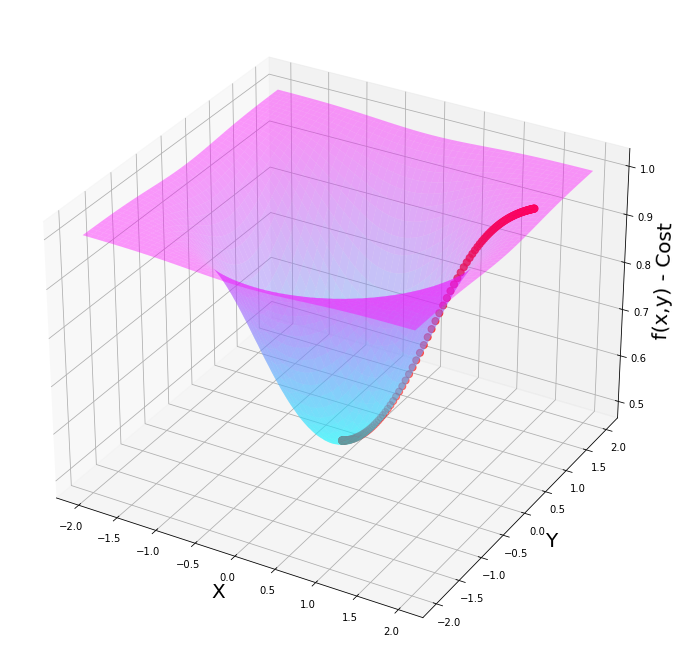

In [100]:
fig = plt.figure(figsize=[16,12])

ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.cool, alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), s=50, color='red')

plt.show()

## Example 5 - Working with Data & a Real cost funciton

### Mean Squared Err: A cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$$

### $$MSE = \frac {1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$$

### $$MSE = \frac {1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2$$

In [101]:
# Make sample data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
#x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7,1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 :', x_5.shape)
print('Shape of y_5 :', y_5.shape)

Shape of x_5 : (7, 1)
Shape of y_5 : (7, 1)


In [107]:
# Quick Liner regression

regr = LinearRegression()
regr.fit(x_5, y_5) 
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


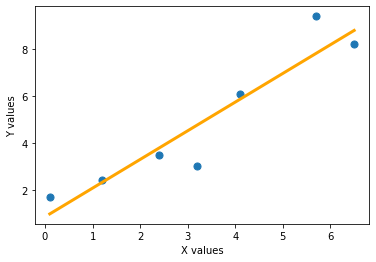

In [109]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
#plt.plot(x_5, color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()
            

In [110]:
# y_hat = theta0 + theta1*x

y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [111]:
# Challange

def mse(y, y_hat):
    mse_calc = 1/7*sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y-y_hat)**2)
    #mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [105]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regression using manual calc is: ', mean_squared_error(y_5, y_hat))
print('MSE regression is: ', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is:  [0.94796558]
MSE regression using manual calc is:  0.9479655759794577
MSE regression is:  0.9479655759794577


## 3d plot for the MSE Cost Function
### Make data for thetas

In [141]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)



## Calc MSE using nested for loops

In [142]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_t0 ', plot_t0.shape)
print('Shape of plot_t1 ', plot_t1.shape)
print('Shape of plot_cost ', plot_cost.shape)

Shape of plot_t0  (200, 200)
Shape of plot_t1  (200, 200)
Shape of plot_cost  (200, 200)


In [143]:
# Nested loop practice

for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and j is {j}')

Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


/var/folders/6_/m8g672753w3d4h1dr179jv680000gn/T/ipykernel_2768/3921474912.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


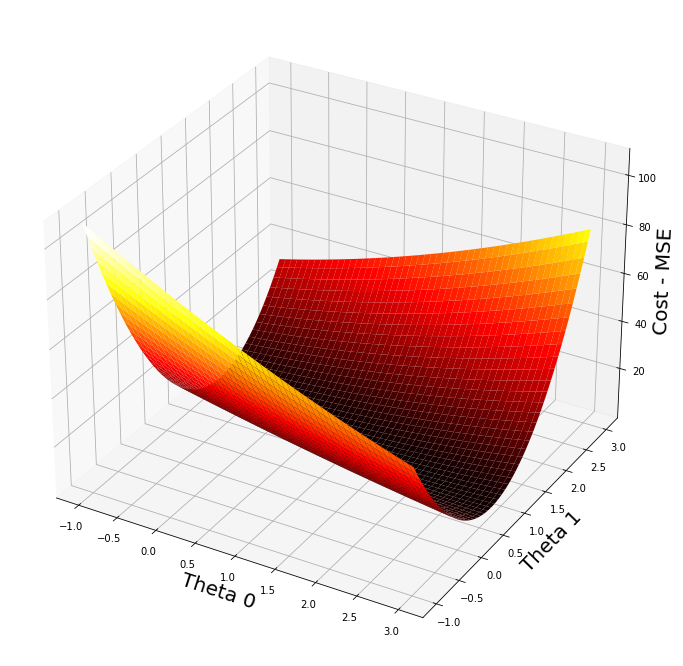

In [149]:
# Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap="hot")
plt.show()


In [161]:
print('Min value of plot_cost', plot_cost.min())

ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j) : ', ij_min)
print('Min MSE for Theta 0 at plot[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot[111][91]', plot_t1[111][91])

#print('Min value of plot_cost', plot_cost.max())

Min value of plot_cost 0.9483826526747163
Min occurs at (i,j) :  (111, 91)
Min MSE for Theta 0 at plot[111][91] 0.829145728643216
Min MSE for Theta 1 at plot[111][91] 1.2311557788944723


/var/folders/6_/m8g672753w3d4h1dr179jv680000gn/T/ipykernel_2768/1424885681.py:3: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


##  Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \Big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \Big) \Big( x^ {(i)}  \big )$$